# Project for the course: Computational Mathematics
## Group 1: Fois Giulia, Manini Nicolas

 ### Analysis for the core random dataset, validating convergence rate

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the summary csv, and the csv containing the execution logs for each task

In [29]:
DatasetFolder = 'Core_Convergence'
SummaryFile = 'summary.csv'
LogsFolder = 'logs'

summary_path = "{}/{}".format(DatasetFolder, SummaryFile)
logs_path = "{}/{}".format(DatasetFolder, LogsFolder)

In [30]:
dfSum = pd.read_csv(summary_path)
TaskNames = dfSum['InputName']

def getTaskNames(batch, batchidx):
    batch = str(batch)
    batchidx=str(batchidx)
    isTask = lambda x: (x.split('_')[1]==batch) & (x.split('_')[2]==batchidx)
    return list(filter(isTask, TaskNames))

dfSum['Batch'] = dfSum['InputName'].str.split('_').str[1]
dfSum['BatchIndex'] = dfSum['InputName'].str.split('_').str[2]
dfSum['KIndex'] = dfSum['InputName'].str.split('_').str[3]

dfSum['Batch'] = dfSum['Batch'].astype(int)
dfSum['BatchIndex'] = dfSum['BatchIndex'].astype(int)
dfSum['KIndex'] = dfSum['KIndex'].astype(int)

dfSum['TimeIter'] = dfSum['Our_time'].div(dfSum['Our_Iter'])
dfSum['TimeDelta_1Iter'] = dfSum['Svd_time'] - dfSum['TimeIter']
dfSum['ConvenientIters'] = np.floor(dfSum['Svd_time'] .div(dfSum['TimeIter']))

Batches = (dfSum['Batch'].unique())
Batches.sort()

In [31]:
import os

dfLogs = {}

# Read all execution logs
for filename in filter(lambda x:x.endswith(".csv"), os.listdir(logs_path)):
    fn = os.path.splitext(filename)[0]
    name = fn[5:]
    dfTemp = pd.read_csv("{}/{}".format(logs_path, filename))
    dfTemp['ErrorRatio'] = (abs(dfTemp['Error'] - dfTemp['Error'].shift(1))).div(dfTemp['Error'].shift(1))
    dfLogs[name] = dfTemp  

In [32]:
dfSum

,InputName,InputM,InputN,InputRk,TargetRk,Opt_delta,Our_delta,Delta_diff,Svd_time,Our_time,Time_gain,Our_Iter,Batch,BatchIndex,KIndex,TimeIter,TimeDelta_1Iter,ConvenientIters
0,rnd_1_1_1,10,10,10,8,0.071865,0.071865,2.456368e-15,0.000910,0.022926,-0.022016,16,1,1,1,0.001433,-0.000522,0.0
1,rnd_2_1_1,50,50,50,40,0.107497,0.107497,1.004544e-12,0.000813,0.418758,-0.417945,219,2,1,1,0.001912,-0.001099,0.0
2,rnd_3_1_1,100,100,100,90,0.024472,0.024472,4.334380e-14,0.001899,0.428216,-0.426316,65,3,1,1,0.006588,-0.004689,0.0
3,rnd_4_1_1,200,200,200,190,0.015575,0.015575,8.724618e-14,0.004224,6.374720,-6.370496,147,4,1,1,0.043365,-0.039142,0.0
4,rnd_5_1_1,300,300,300,200,0.225300,0.225300,1.052231e-11,0.011923,70.532065,-70.520142,771,5,1,1,0.091481,-0.079558,0.0


### Plots

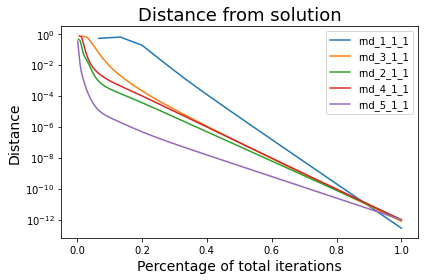

In [33]:
plt.yscale('log')

for name in dfLogs:
    dfTmp = dfLogs[name]
    
    errs = dfTmp['ErrorRatio'][1:]
    it_count = len(errs)
    
    xax = np.array(range(1,it_count+1))/it_count
    yax = errs
    
    plt.plot(xax, yax, label=name)
    

plt.title(r'Distance from solution', fontsize=18)
plt.xlabel("Percentage of total iterations", fontsize=14)
plt.ylabel(r'Distance', fontsize=14)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('corerand_linearcon.png', format='png', dpi=300)
plt.show()